## **Обработка данных. Описательная статистика. Гистограммы размаха. Тепловая матрица корреляций**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pprint
import seaborn as sns

In [2]:
data=pd.read_excel('/Users/denisbogomolov/Documents/Data_Analysis/mitosis.xlsx')

In [3]:
data.head(5)

,time_inj (hrs),cm_1,em_1,cm_1_2,em_1_2,cm_2,em_2,cm_3,em_3,cm_4,em_4
0,13,74.4,98.1,16.6,1.9,9.0,0.0,0.0,0.0,0.0,0.0
1,19,61.1,67.7,16.1,19.7,21.6,12.6,1.2,0.0,0.0,0.0
2,25,21.4,54.8,14.5,20.8,47.4,23.3,16.2,1.1,0.5,0.0
3,31,3.9,25.3,0.9,13.7,29.8,43.2,47.7,18.7,17.7,0.7
4,37,0.0,9.1,0.0,2.8,0.0,25.4,0.0,33.1,0.0,29.6


### *Условные обозначения*
- **time_inj (hrs)** - время после инъекций (в часах)
- **cm_1** - клетки контрольной группы, вступившие в митоз после прохождения одного митотического цикла
- **em_1** - клетки опытной группы, вступившие в митоз после прохождения одного митотического цикла
- **cm_1_2** - клетки контрольной группы,прошедшие последовательно S- период, оставшуюся часть первого и второй митозы
- **em_1_2** - клетки опытной группы,прошедшие последовательно S- период, оставшуюся часть первого и второй митозы
- **cm_2** - клетки контрольной группы, вступившие в митоз после прохождения двух митотических циклов
- **em_2** - клетки опытной группы, вступившие в митоз после прохождения двух митотических циклов
- **cm_3** - клетки контрольной группы, вступившие в митоз после прохождения трех митотических циклов
- **em_3** - клетки опытной группы, вступившие в митоз после прохождения трех митотических циклов
- **cm_4** - клетки контрольной группы, вступившие в митоз после прохождения четырех митотических циклов
- **em_4** - клетки опытной группы, вступившие в митоз после прохождения четырех митотических циклов

In [4]:
data.describe()

,time_inj (hrs),cm_1,em_1,cm_1_2,em_1_2,cm_2,em_2,cm_3,em_3,cm_4,em_4
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.00000
mean,25.000000,32.160000,51.000000,9.620000,11.780000,21.560000,20.900000,13.020000,10.580000,3.64000,6.06000
std,9.486833,33.802411,35.099288,8.412907,9.028123,18.426828,16.039015,20.564338,14.889829,7.86276,13.16275
min,13.000000,0.000000,9.100000,0.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,19.000000,3.900000,25.300000,0.900000,2.800000,9.000000,12.600000,0.000000,0.000000,0.00000,0.00000
50%,25.000000,21.400000,54.800000,14.500000,13.700000,21.600000,23.300000,1.200000,1.100000,0.00000,0.00000
75%,31.000000,61.100000,67.700000,16.100000,19.700000,29.800000,25.400000,16.200000,18.700000,0.50000,0.70000
max,37.000000,74.400000,98.100000,16.600000,20.800000,47.400000,43.200000,47.700000,33.100000,17.70000,29.60000


- **count** - общее число значений в каждом столбце
- **mean** - среднее арифметическое
- **std** - стандартное отклонение
- **min** - минимальное значение по столбцам
- **25%** - первый квартиль (Q1)
- **50%** - второй квартиль (Q2)
- **75%** - третий квартиль (Q3)
- **max** - максимальное значение по столбцам

___

time_inj (hrs)       AxesSubplot(0.125,0.749828;0.133621x0.130172)
cm_1              AxesSubplot(0.285345,0.749828;0.133621x0.130172)
em_1               AxesSubplot(0.44569,0.749828;0.133621x0.130172)
cm_1_2            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
em_1_2            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
cm_2                 AxesSubplot(0.125,0.593621;0.133621x0.130172)
em_2              AxesSubplot(0.285345,0.593621;0.133621x0.130172)
cm_3               AxesSubplot(0.44569,0.593621;0.133621x0.130172)
em_3              AxesSubplot(0.606034,0.593621;0.133621x0.130172)
cm_4              AxesSubplot(0.766379,0.593621;0.133621x0.130172)
em_4                 AxesSubplot(0.125,0.437414;0.133621x0.130172)
dtype: object

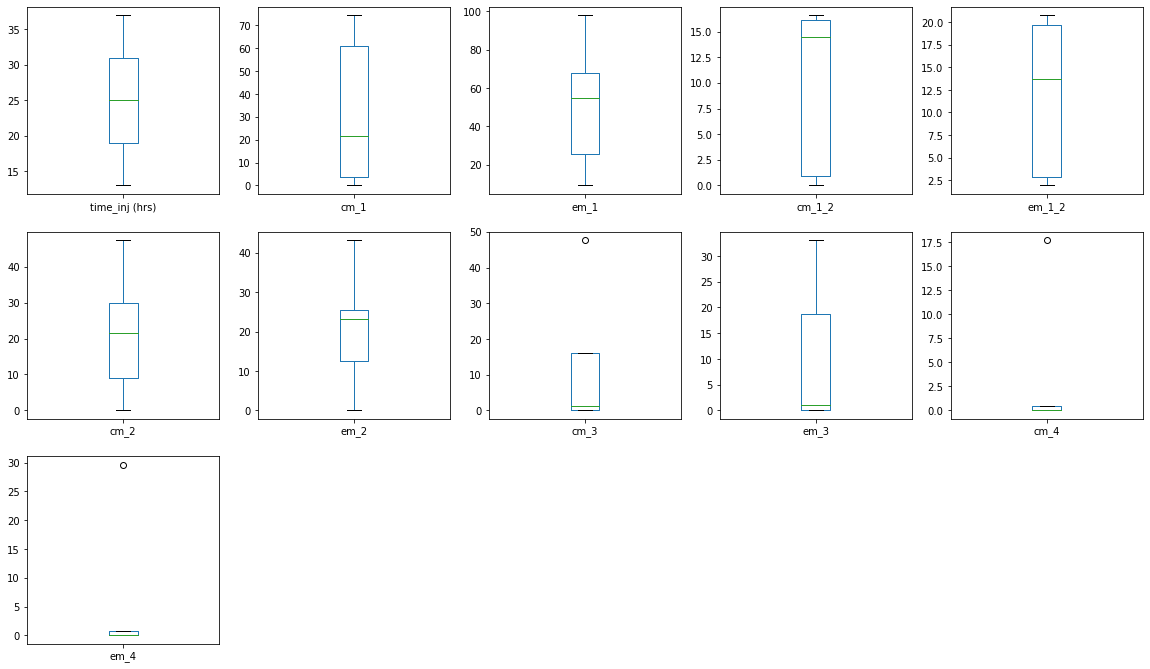

In [5]:
data.plot(kind='box', subplots=True, layout=(5,5), figsize=(20,20))

**Гистограммы размаха по каждому столбцу:** 
- Медиана (зеленая линия)
- Q1 и Q3 ("усы")
- "Выбросы" (o)

*Можно сделать отдельные большие гистограммы размаха по каждому столбцу, например как...*

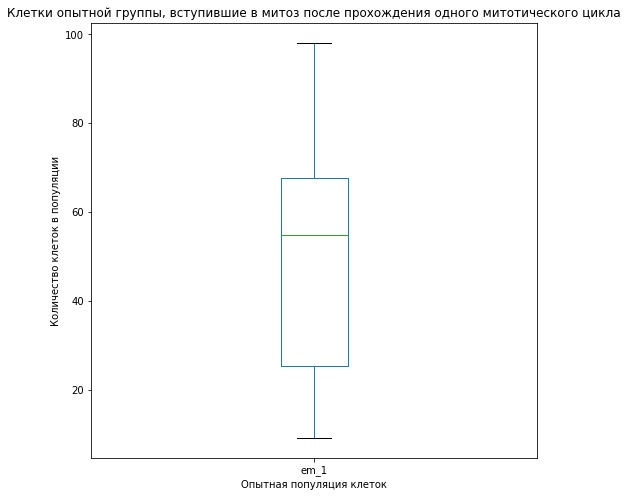

In [6]:
data['em_1'].plot(kind='box', figsize=(8,8))
plt.title('Клетки опытной группы, вступившие в митоз после прохождения одного митотического цикла')
plt.xlabel('Опытная популяция клеток')
plt.ylabel('Количество клеток в популяции')
plt.show()

___


## **Пример графика зависимости**

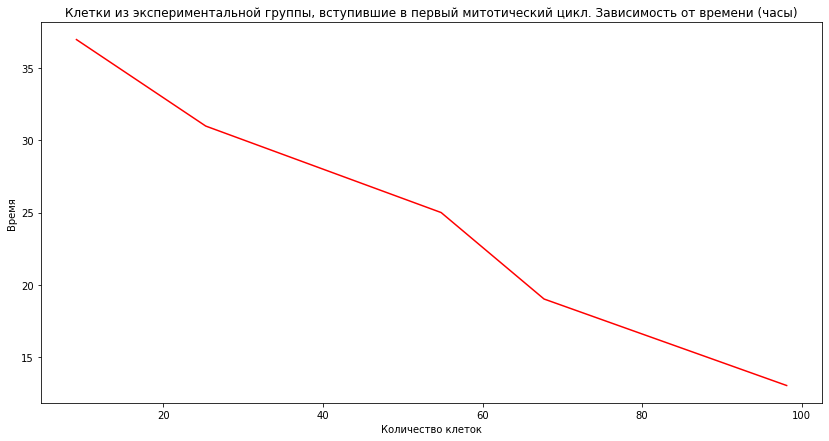

In [17]:
data.groupby('em_1').agg({'time_inj (hrs)':'mean'}).sort_values(by='em_1').\
plot(figsize = (14,7), color='red', legend=False,)
                                                                                                                   
plt.title('Клетки из экспериментальной группы, вступившие в первый митотический цикл. Зависимость от времени (часы)')
plt.xlabel('Количество клеток')
plt.ylabel('Время')
plt.show()

### **Обобщенная корреляционная матрица. "Тепловая карта корреляций"**

<AxesSubplot:>

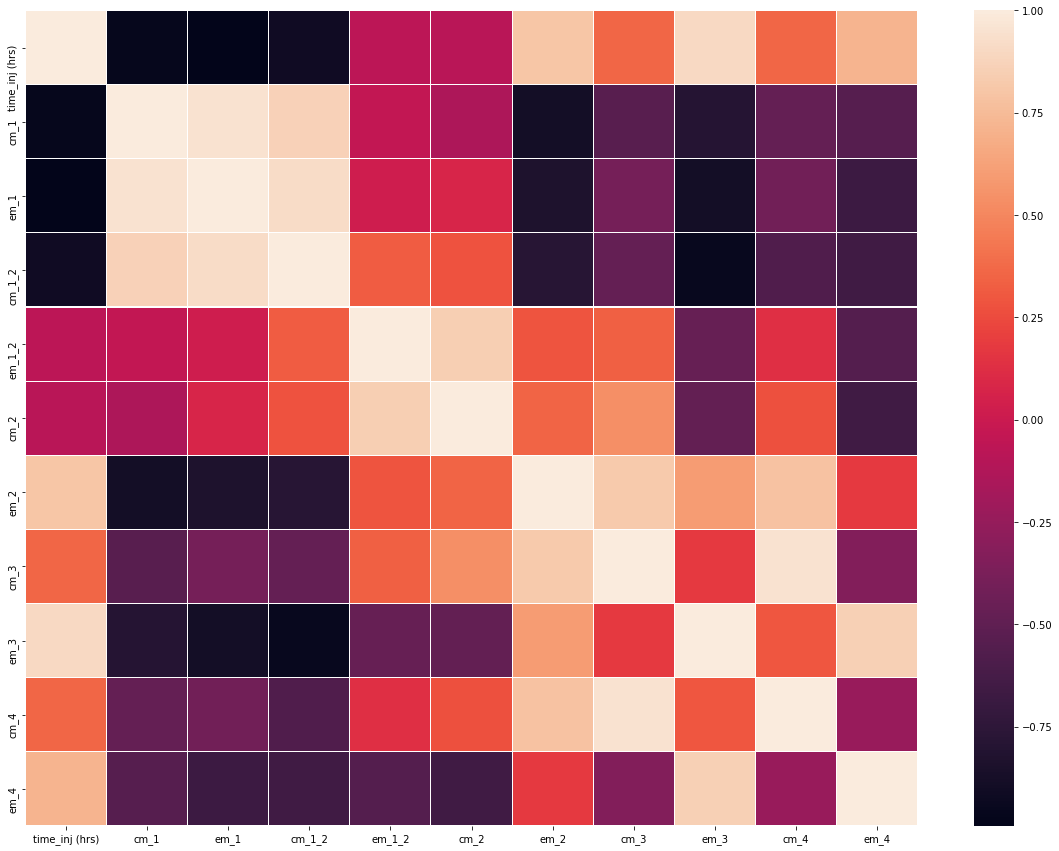

In [7]:
corr = data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=.1)

## **Пример корреляции между различными опытными и контрольными группами**

In [13]:
data_corr=data[['cm_1','em_1','cm_1_2','em_1_2']].corr()
data_corr.style.background_gradient(cmap='coolwarm')

,cm_1,em_1,cm_1_2,em_1_2
cm_1,1.000000,0.949415,0.866513,-0.041488
em_1,0.949415,1.000000,0.916650,0.022177
cm_1_2,0.866513,0.916650,1.000000,0.316058
em_1_2,-0.041488,0.022177,0.316058,1.000000
